# Proyecto Optimización
## Modulo 3
## Tema optimización de costo de gasolina en relación con las rutas del chofer 
### Fecha 16/11/2024
### Antonio Ortegón Muñoz
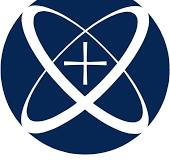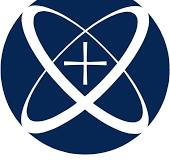

## Introducción

Lo que se pretende realizar es optimizar el costo de la gasolina que se hace semanamente en relación con las enteregas del chofer a la hora de ir a las distintar obras. El impacto que se busca tener es abaratar el costo de las obras mediante el gasto excesivo de gasolina. La relación que tiene con la ingeneria civil, es que, como anteriormente se mencionó, abartar el costo de las obras mediante la creación de ruta más optima para poder entregar el material a la obra. 

## Marco Teórico

Los conceptos que se deben de explicar son muy pocos, sin embargo, sí es importante dimensionar que aunque pareciera muy inutil es gasto de la gasolina en la obra, este concepto engloba muchas cosas más. Como es el tiempo de traslado, los costos, el tiempo de entrega de obra, etc. 

Un ejemplo de algoritmo que hace esto, es el algoritmo de Dijkstra, el cual es un algoritmo que se centra en buscar las distancia smás cortas posibles desde el Punto A hasta el Punto B. Este algoritmo es funtamental en la informacitca y las mátematica debido a que busca la ruta más corta posible mediante un nodo de origen hasta los demás nodos mediante un grafo, el encargado de desarrollar este algoritmo fue Edsger W. Dijkstra en 1956. 

Algunos de sus funcionamientos: 
- Se asigna una distancia inicial el cual dera el nodod de origen y el infinito de los demás nodos.
- Se eleige el nodo no visitiado con la distancia más corta desde el nodo de origen.
- Por cada vecino que haya va irlo visitando si no lo encuentra y calcula la distancia desde el origen hasta ese punto.
- Las iteraciones van de 2 hasta 4 veces o hasta que se encuentre la ruta más corta posible

Las aplicaciones que tiene son muchas pero las más principales son las siguientes: 
- GPS
- Redes de comunicación
- Planificacions de rutas en logística

Sin embargo, las limitaciones es que puede haber resultado incorrectos debido a que no esta preparado cuando las aristas del grafo son negativas. 

# Falta agregar el algoritmo de 

## Objetivos
- Demostrar que el ahorro un ahorro de distancias y gasolina
## Objetivos especificos
- Mediante el uso de la programación y una lista de las distinas obras que se tienen en la ciudad mostar que puede haber un ahorro
- Se busca relacionar huristica y los métodos de busqueda

## Programación

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

distancias=pd.read_excel("Proyecto Modulo 3.xlsx", sheet_name=0).set_index("Unnamed: 0")
distancias

,Oficina,Naucalpan,Santa fe,Lomas,Satelite
Unnamed: 0,,,,,
Oficina,0,5,8,12,25
Naucalpan,5,0,3,7,20
Santa fe,8,3,0,4,17
Lomas,12,9,4,0,13
Satelite,25,20,17,13,0


In [11]:
gasolinas=pd.read_excel("Proyecto Modulo 3.xlsx", sheet_name=1).set_index("Unnamed: 0")
gasolinas

,Lunes,Martes,Miercoles,Jueves,Viernes
Unnamed: 0,,,,,
Oficina,500,600,300,400,1800
Naucalpan,800,250,0,350,200
Santa Fe,400,0,200,1300,300
Lomas,0,300,1000,400,250
Santa Fe,450,0,350,1700,1600


In [19]:
lugares=distancias.index.tolist()
lugares

['Oficina', 'Naucalpan', 'Santa fe', 'Lomas', 'Satelite']

In [31]:
def F(x): 
    lista=np.random.permutation(x)
    return lista.tolist()
def F2(a, b): 
    return distancias.loc[a, b]
def F3(lista): 
    DT=0
    n=len(lista)-1
    for i in range(n): 
        a=lista[i]
        b=lista[i+1]
        DT+=F2(a, b)
    DT+=F2(lista[-1], lista[0])
    return DT

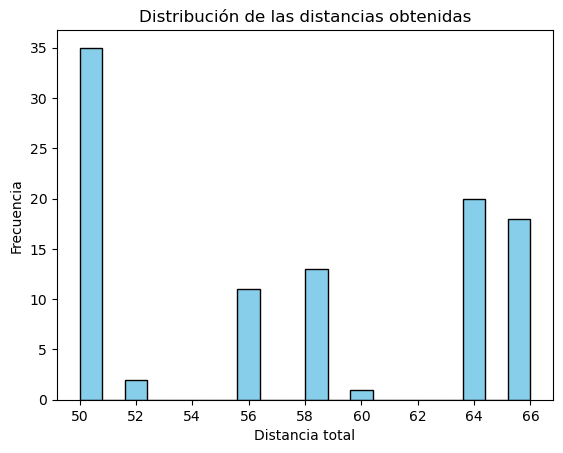

In [35]:
i=0
N=30
T=1000
M=100
rutas=[]
dist=[]
for j in range(M): 
    R1=F(lugares)
    while T>=1: 
        while i<N: 
            R2=R1.copy()
            ind=np.random.choice(range(len(lugares)), 2, replace=False)
            a, b=ind[0], ind[1]
            R2[a], R2[b]=R1[b], R1[a]
            p=np.random.uniform(0,1)
            D1=F3(R1)
            D2=F3(R2)
            q=np.exp((D1-D2)/T)
            if p<q: 
                R1=R2.copy()
            i+=1
        T=T*.9
    rutas.append(R1.copy())
    dist.append(F3(R1.copy()))
plt.figure()
plt.hist(dist, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de las distancias obtenidas")
plt.xlabel("Distancia total")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
best=min(dist)
best

50

In [41]:
index_b=dist.index(best)
index_b

0

In [43]:
best_r=rutas[index_b]
best_r

['Lomas', 'Satelite', 'Santa fe', 'Naucalpan', 'Oficina']

In [47]:
def costo(rutas,costo): 
    c_t=costo.loc[rutas].mean(axis=1)
    return c_t.mean
costo(best_r, gasolinas)

KeyError: "['Lomas', 'Satelite', 'Santa fe', 'Oficina'] not in index"

In [71]:
def dijk(lugares, distancias): 
    graf=nx.Graph()
    for i in lugares: 
        for j in lugares:
            if i!=j: 
                graf.add_edge(i, j, weight=distancias.loc[i, j])
    nodo_i=lugares[0]
    nodo_fin=lugares[-1]
    rutas_cortas=nx.single_source_dijkstra_path(graf, source=nodo_i)
    distancias_cortas=nx.single_source_dijkstra_path_length(graf, source=nodo_i)
    best_r=rutas_cortas[nodo_fin]
    best_d=distancias_cortas[nodo_fin]
    return best_r, best_d

Lo que hará será crear un grafo basandose en las distancias entre los lugares, luego calcula las rutas más cortas desde el primer lugar de la lista hada los demás nodos y por último encontrará la ruta más costa y la ditancia mínima hacía el lumtimo lugar de la lista. 

In [65]:
mejor_r, mejor_d=dijk(lugares, distancias

In [67]:
mejor_r

['Oficina', 'Satelite']

In [69]:
mejor_d

25

## Referencias
https://codigonautas.com/algoritmo-dijkstra-que-es-ejemplo/?utm_source=chatgpt.com
https://www.freecodecamp.org/espanol/news/algoritmo-de-la-ruta-mas-corta-de-dijkstra-introduccion-grafica/